In [1]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from astropy.table import Table
from pathlib import Path
from astropy.io import fits
from xhcd.core import Spectrum,evtlist
from astropy.wcs import WCS
import os
from fitsutil import *

In [ ]:
def fit_rotated_2d_gaussian(data, x=None, y=None, plot_result=False,iter = None):
    """
    Fit a rotated 2D Gaussian to 2D data using Astropy's Gaussian2D model.

    Parameters:
        data : 2D numpy array
            The input data array to fit.
        x, y : 2D numpy arrays, optional
            Meshgrid coordinates corresponding to data. If None, will be auto-generated.
        plot_result : bool
            Whether to plot the original data and fit result.

    Returns:
        fitted_model : Gaussian2D
            The best-fit Gaussian2D model.
    """
    # Generate coordinate grids if not provided
    ny, nx = data.shape
    if x is None or y is None:
        y, x = np.mgrid[:ny, :nx]

    # Estimate initial parameters
    amplitude_init = np.max(data)
    x_mean_init = x[data == amplitude_init][0]
    y_mean_init = y[data == amplitude_init][0]

    # Initial guess for model
    gauss_init = models.Gaussian2D(amplitude=amplitude_init, x_mean=x_mean_init,
                                   y_mean=y_mean_init, x_stddev=0.089, y_stddev=0.069, theta=0)

    # Fitting with Levenberg-Marquardt algorithm
    fitter = fitting.LevMarLSQFitter()
    fitted_model = fitter(gauss_init, x, y, data)
    covariance_matrix = fitter.fit_info['param_cov']
    if fitted_model.x_fwhm > 1 or fitted_model.y_fwhm >1 :
        print(iter)

    if plot_result:
        fit_data = fitted_model(x, y)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(data, origin='lower', cmap='viridis')
        axes[0].set_title("Original Data")
        axes[1].imshow(fit_data, origin='lower', cmap='viridis')
        axes[1].set_title("Fitted Gaussian")
        plt.tight_layout()
        plt.show()

    return fitted_model,covariance_matrix

In [ ]:
def generate_rotated_gaussian_data():
    y, x = np.mgrid[0:100, 0:100]
    model = models.Gaussian2D(amplitude=3, x_mean=50, y_mean=50,
                              x_stddev=10, y_stddev=20, theta=np.pi/4)
    data = model(x, y) + 0.1 * np.random.normal(size=x.shape)
    return data, x, y

data, x, y = generate_rotated_gaussian_data()
fitted = fit_rotated_2d_gaussian(data, x, y, plot_result=True)

# Print the fitted parameters
print(f"Amplitude: {fitted.amplitude.value}")
print(f"x_mean: {fitted.x_mean.value}")
print(f"y_mean: {fitted.y_mean.value}")
print(f"x_stddev: {fitted.x_stddev.value}")
print(f"y_stddev: {fitted.y_stddev.value}")
print(f"theta (radians): {fitted.theta.value}")

In [ ]:
def fit_rotated_2d_gaussian(data, x=None, y=None, plot_result=False):
    """
    Fit a rotated 2D Gaussian to 2D data using Astropy's Gaussian2D model.

    Parameters:
        data : 2D numpy array
            The input data array to fit.
        x, y : 2D numpy arrays, optional
            Meshgrid coordinates corresponding to data. If None, will be auto-generated.
        plot_result : bool
            Whether to plot the original data and fit result using contourf.

    Returns:
        fitted_model : Gaussian2D
            The best-fit Gaussian2D model.
    """
    # Generate coordinate grids if not provided
    ny, nx = data.shape
    if x is None or y is None:
        y, x = np.mgrid[:ny, :nx]

    # Estimate initial parameters
    amplitude_init = np.max(data)
    x_mean_init = x[data == amplitude_init][0]
    y_mean_init = y[data == amplitude_init][0]

    # Initial guess for model
    gauss_init = models.Gaussian2D(amplitude=amplitude_init, x_mean=x_mean_init,
                                   y_mean=y_mean_init, x_stddev=5, y_stddev=5, theta=0)

    # Fitting with Levenberg-Marquardt algorithm
    fitter = fitting.LevMarLSQFitter()
    fitted_model = fitter(gauss_init, x, y, data)

    if plot_result:
        fit_data = fitted_model(x, y)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        contour_levels = 20  # number of contour levels

        axes[0].contourf(x, y, data, levels=contour_levels, cmap='viridis')
        axes[0].set_title("Original Data")
        axes[0].set_xlabel("X")
        axes[0].set_ylabel("Y")

        axes[1].contourf(x, y, fit_data, levels=contour_levels, cmap='viridis')
        axes[1].set_title("Fitted Gaussian")
        axes[1].set_xlabel("X")
        axes[1].set_ylabel("Y")

        plt.tight_layout()
        plt.show()

    return fitted_model

In [ ]:
import shutil
from pathlib import Path 
from astropy.io import fits
import sys, getopt,os
import numpy as np


#def fitsmove(rawFitsDirectory):
#    directory = Path(rawFitsDirectory)

#def stackFits(fitsDirectory):
data_dir = Path("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0")

det_sns= ['s23056','s23196','s23197','s23200']

for a in range(len(det_sns)):
    file_list = [file for file in os.listdir(f"{data_dir}/{det_sns[a]}") if os.path.isfile(os.path.join(f"{data_dir}/{det_sns[a]}", file))] 
    blank = np.zeros((550,550))
        
        #outfits = fits.PrimaryHDU(data=blank)
        
    for b in range(len(file_list)):
        path = Path(str(data_dir)+'/'+det_sns[a] +'/'+str(file_list[b]))
        d = fits.open(path)
        data = d[1].data # data contents of the fits file
        outFileName = data_dir/Path(det_sns[a])/Path(det_sns[a]+"_combined")
        #fits.append(outFileName,data)

        print(b)


#stackFits("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0")

In [ ]:
import matplotlib.pyplot as plt

evnt = fits.open("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_20_0\output\eventlist_s23056_th1_50.fits.gz")
data = evnt[1].data

from xhcd.core import Spectrum
import xhcd.speedster.eventProcessing
from bc_imaging_analysis import imaging_analysis

print(evnt[1].columns)

In [ ]:
#from astropy.table import Table

def eventlist_in_browser(event_list):
    if type(event_list) == 'pathlib.PosixPath' or 'pathlib.WindowsPath':
        event_list = fits.open(event_list, memmap=True)
        event_data = Table(event_list[1].data)
        event_data.show_in_browser()
    elif type(event_list) != 'astropy.io.fits.fitsrec.FITS_rec':  
        event_data = Table(event_list[1].data)
        event_data.show_in_browser()
  

eventlist_in_browser(Path(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\output\eventlist_s23056_th1_50.fits.gz"))
type(Path(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\s23056\Al_reg__0000_0x0000_B0.fits.fz"))

In [ ]:
event_list = fits.open(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\output\eventlist_s23056_th1_50.fits.gz", memmap=True)
event_data = Table(event_list[1].data)
header = event_list[0]
dat = event_list[1].section[10:20]

Test code for taking a random sampling of a given event list

In [ ]:
#a = [-2,1,5,3,8,5,6]
#b = [1,2,5]
#c = [ a[i] for i in b]

d = fits.open(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\output\eventlist_s23056_th1_50.fits.gz")
data = d[1].data
columns = d[1].columns

#print(columns)

new_columns = fits.ColDefs(columns)
new_hdu =  fits.BinTableHDU.from_columns(new_columns)
end = len(data)
sample_index = np.random.randint(0,end,500)
sub_sample = [data[i] for i in sample_index]


d[1].data = d[1].data[sample_index]

#data_2 = d[1].data
d.writeto('test.fits',overwrite=True)

In [ ]:
import matplotlib.pyplot as plt

from xhcd.core import Spectrum

al_test = Spectrum('test2.fits', th1=50, th2=50, graded=False)
al_test.regrade(50,200)


Test code for splitting up an event list starting and stopping at a specific index

In [ ]:
d = fits.open(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\output\eventlist_s23056_th1_50.fits.gz")
data = d[1].data
fraction  = 5
numEl  = int(len(data)/fraction)
n = 2
d[1].data = data[n*numEl:(n+1)*numEl]
d.writeto('test.fits',overwrite=True)


In [ ]:
d = fits.open(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\output\eventlist_s23056_th1_50.fits.gz")
data = d[1].data
cols = d[1].columns

newDat = d[1].data[0:200]
hdu = fits.BinTableHDU.from_columns(cols)
hdu.data = newDat
#hdu.writeto('test2.fits',overwrite=True)

test = fits.open('test4.fits')

Test code for a function to split an event list in to many sub-event lists

In [ ]:
event_list=Path(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\output\eventlist_s23056_th1_50.fits.gz")
outdir = r"C:\Users\ajo5182\Documents\astro\psf\psf_source_localization\test"
numberOfLists = 50000
eventlist = 'test'

d = fits.open(event_list)
data = d[1].data
cols = d[1].columns
size = len(data)

outdir = Path(outdir)

subSampleHDU = fits.BinTableHDU.from_columns(cols)

for n in range(int(size/numberOfLists)):
    subSampleHDU.data = d[1].data[n*int(size/numberOfLists):(n+1)*int(size/numberOfLists)]
    fitsName = Path(eventlist+str(n)+'.fits')

    subSampleHDU.writeto(outdir/fitsName,overwrite=True)

In [ ]:
data_dir = Path(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\output") 
outdir = Path(r"C:\Users\ajo5182\Documents\astro\psf\psf_source_localization\test")
append = "subsample"

numberOfSamples = 50000


file_list = [file for file in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, file))] 

s23056 = fits.open(data_dir/Path(file_list[0]))
s23056_data = s23056[1].data 
#s23056_cols = s23056[1].cols
s23196 = fits.open(data_dir/Path(file_list[1]))
s23196_data = s23196[1].data 
#s23196_cols = s23196[1].cols
s23197 = fits.open(data_dir/Path(file_list[2]))
s23197_data = s23197[1].data 
#s23197_cols = s23197[1].cols
s23200 = fits.open(data_dir/Path(file_list[3]))
s23200_data = s23200[1].data 
#s23200_cols = s23200[1].cols



for a in range(len(file_list)):
    d = fits.open(data_dir/Path(file_list[a]))
    data = d[1].data 
    cols = d[1].columns
    size = len(data)
    subSampleHDU = fits.BinTableHDU.from_columns(cols)
    for n in range(int(size/numberOfSamples)):
        subSampleHDU.data = d[1].data[n*int(size/numberOfSamples):(n+1)*int(size/numberOfSamples)]
        out = outdir/Path('subsample'+str(n))
        if os.path.isdir((out)) == False:
            os.mkdir(out)
            print('made the directory')
        else:
            print("didn't make the directory")

        subSampleHDU.writeto(out/Path(file_list[a]).with_suffix(''),overwrite=True)



In [ ]:
out = []
sublist = 5
test = 10*np.random.rand(100)
numEl = int(len(test)/sublist)
for n in range(sublist):
    print(n)
    print(test[n*numEl:(n+1)*numEl])


In [ ]:

data_dir = Path(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_0_0\output") 
outdir = Path(r"C:\Users\ajo5182\Documents\astro\psf\psf_source_localization\test")
append = "subsample"

numberOflists = 5


file_list = [file for file in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, file))] 

'''
s23056 = fits.open(data_dir/Path(file_list[0]))
s23056_data = s23056[1].data 
#s23056_cols = s23056[1].cols
s23196 = fits.open(data_dir/Path(file_list[1]))
s23196_data = s23196[1].data 
#s23196_cols = s23196[1].cols
s23197 = fits.open(data_dir/Path(file_list[2]))
s23197_data = s23197[1].data 
#s23197_cols = s23197[1].cols
s23200 = fits.open(data_dir/Path(file_list[3]))
s23200_data = s23200[1].data 
#s23200_cols = s23200[1].cols
'''


for a in range(len(file_list)):
    d = fits.open(data_dir/Path(file_list[a]))
    data = d[1].data 
    cols = d[1].columns
    size = len(data)
    numberOfSamples = int(size/numberOflists)
    subSampleHDU = fits.BinTableHDU.from_columns(cols)
    for n in range(numberOflists):
        subSampleHDU.data = d[1].data[n*numberOfSamples:(n+1)*numberOfSamples]
        out = outdir/Path('subsample'+str(n))
        if os.path.isdir((out)) == False:
            os.mkdir(out)
            #print('made the directory')
        #else:
        #    print("didn't make the directory")

        subSampleHDU.writeto(out/Path(file_list[a]).with_suffix(''),overwrite=True)



In [ ]:
data_path1 = Path(
    r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\subsampled_eventlists\BC001_Al_FF_243K_HORI_10_0\subsample0\Analysis\imaging_analysis_20241217\image_reconstruction.fits.gz"
    )
d = fits.open(data_path1) # open fits file
data = d[0].data # data contents of the fits file
#shape =  data.shape

ny, nx = data.shape
ym, xm = np.mgrid[:ny, :nx]
w = WCS(d[0].header)
x,y= w.array_index_to_world_values(ym,xm)
x = (x+(180+360)) % 360 -180

peak = np.max(data)
peak_loc = np.unravel_index(np.argmax(data),data.shape)
window = 10

windowed_data = data[peak_loc[0]-window:peak_loc[0]+window, peak_loc[1]-window:peak_loc[1]+window]
x_window = x[peak_loc[0]-window:peak_loc[0]+window, peak_loc[1]-window:peak_loc[1]+window]
y_window = y[peak_loc[0]-window:peak_loc[0]+window, peak_loc[1]-window:peak_loc[1]+window]

fitted,covariance_matrix = fit_rotated_2d_gaussian(windowed_data, x_window, y_window, plot_result=True)


In [ ]:
d= fits.open("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\subsampled_eventlists\BC001_Al_FF_243K_HORI_10_0\subsample5\Analysis\imaging_analysis\combined_events_th1_200.fits.gz")
data = d[1].data

In [ ]:
direct = Path(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\subsampled_eventlists\BC001_Al_FF_243K_HORI_5_0")

folder_list = [folder for folder in os.listdir(direct) if os.path.isdir(os.path.join(direct, folder))]

for a in range(len(folder_list)):
    if str(direct/Path(folder_list[a])/Path())

In [ ]:
def random_sample_events_list(directory, sampleNumber, outdir, eventlist, save = True):
    
    # given an event list this returns an event list with containing a given number
    # of subsamples from the event list
    
    # event_list: string or path to the event list you want to sample
    # sampleNumber: number of samples from the event list you want
    # oudir: directory to save the subsample to
    # eventlist: name to save the sub-sampled event list too
    # 
    # save: to save the file to the location in eventlist
    
    directory = Path(directory)
    d = fits.open(directory/Path(eventlist))
    data = d[1].data
    cols = d[1].columns
    
    end = len(data)
    if sampleNumber > end:
        sampleNumber = end
        print("number of samples requested is greater than number of events")
    population = range(0,end)
    sample_index = np.random.choice(population, sampleNumber,replace = False)

    subSampleHDU = fits.BinTableHDU.from_columns(cols)
    subSampleHDU.data = d[1].data[sample_index]

    if save == True:
        if os.path.isdir(Path(outdir)) == False  :
            os.makedirs(Path(outdir))
        subSampleHDU.writeto(outdir/Path(eventlist),overwrite=True)
    
    return subSampleHDU

In [ ]:
d = random_sample_events_list(
    r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\y2024-12-09\BC001_Al_FF_243K_HORI_5_0\output",
    2000,
   r"c:\Users\ajo5182\Documents\astro\test\test",
    "eventlist_s23200_th1_50.fits.gz"
    )

In [ ]:
d = fits.open("Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\Raw Long Cell Data\Test\BC001_Al_FF_243K_HORI_5_0\eventlist_s23196_th1_50.fits.gz")
print(len(d[1].data))

xhcd.core.spectrum.Spectrum

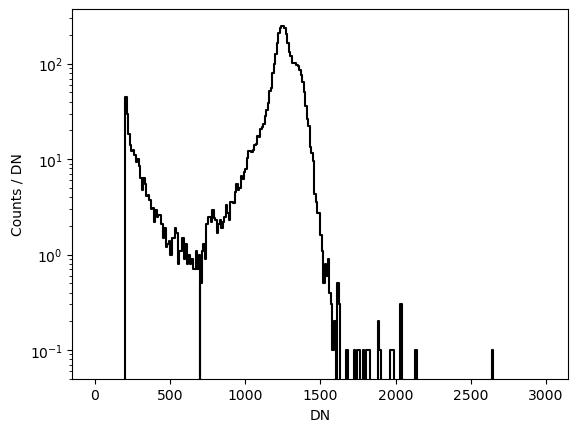

In [2]:
eventlistPath = Path(r"Z:\Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-12\BC057_Ti_FF_233_HORI_10_0\Analysis\imaging_analysis_20241213\combined_events_th1_200.fits.gz")

Ti = Spectrum(eventlistPath,th1=200,th2=50)
#al.applyGainCorrection(r"Z:\Astro_X_Ray\HCD_Data\Speedster_data\Speedster550_data\s23056\gainmaps\Flight_gainmap_233K_25V_Full_Frame.fits")
Ti_noise = Ti.filterEvents(sumrange=[0,700])
Ti_noise.plotSpectrum(binsize=10,show=False)
Ti_signal = Ti.filterEvents(sumrange=[700,3000])
Ti_signal.plotSpectrum(binsize=10,show=False)
#plt.show()
type(Ti)

In [ ]:
outpath1 = Path(r"C:\Users\ajo5182\Documents\astro\data\ti_noise.fits.gz")
outpath2 = Path(r"C:\Users\ajo5182\Documents\astro\data\ti_signal.fits.gz")
splitEventListEnergy(Ti,outpath1,outpath2,700,th2=60)

In [3]:
d = fits.open(eventlistPath)
type('d')



str

In [7]:
b,c= splitEventList(d,700,'sum')
a =random_sample_events_list(d,200)